**PRODUCTION AND SUPPLY OF FOOD IN AFRICA (2004-2013)**

**Summary**

Agriculture, the practice of cultivating plants and rearing animals to provide food and other products, is arguably the most important economic activity in Africa. It plays a major role in the production of food that ensures sustenance of life and environmental preservation, amongst other things.

We analyze the Africa Food Population data and Africa Food Supply data to identify the top producers and consumers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prod = pd.read_csv('C:/Users/USER/Downloads/Africa Food Production (2004 - 2013).csv')
supp = pd.read_csv('C:/Users/USER/Downloads/Africa Food Supply (2004 - 2013).csv')

**FOOD PRODUCTION**

In [3]:
prod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [4]:
#check to ensure data types are correct and there are no missing values
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


no missing data.

In [5]:
#check the number of unique values
prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

- There are 45 Countries captured in the data, 94 Food Items captured over a period of 10 years.

In [6]:
prod['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

In [7]:
prod['Item'].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

In [8]:
prod['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [9]:
#check the description
prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


- From the percentiles and max figure of the value column, we can dedue that there are outliers in the data.

In [10]:
#Average Food Production
prod['Value'].mean()

327.7852012115967

In [11]:
#Median of Food Production
prod['Value'].median()

18.0

In [12]:
#Using the data description
prod_25th = 3
prod_75th = 108

prod_iqr = prod_75th - prod_25th

prod_iqr

105

<AxesSubplot:title={'center':'Food Production Trend'}, xlabel='Year', ylabel='Value'>

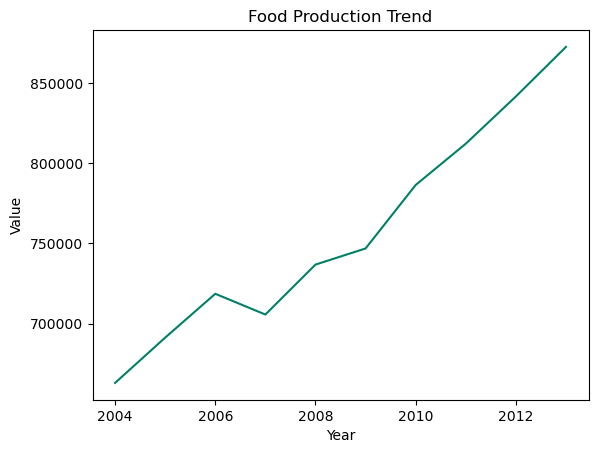

In [13]:
#visualize the food production trend
prod.groupby('Year')['Value'].sum().plot(kind = 'line',cmap = 'summer', title = 'Food Production Trend',ylabel = 'Value')

- There was an increase in food production between 2004 and 2013, with the exception in the year 2007, where there was a decline.

In [14]:
#View the yearly production by Country
pd.crosstab(prod.Country,prod.Year,prod.Value,aggfunc = np.sum, margins = True).sort_values(by = 'All')

Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
Country,,,,,,,,,,,
Djibouti,55,62,56,63,62,68,75,72,77,76,666
Sao Tome and Principe,113,117,117,113,114,116,114,107,111,130,1152
Cabo Verde,148,156,158,157,172,158,149,181,187,192,1658
Lesotho,371,383,383,344,347,339,451,397,352,418,3785
Gambia,473,440,458,360,472,549,614,411,465,457,4699
Botswana,461,460,454,439,470,484,503,539,496,502,4808
Guinea-Bissau,637,703,705,654,725,700,743,807,787,835,7296
Mauritania,906,1016,875,913,909,953,1110,1024,1182,1151,10039
Gabon,1211,1246,1263,1289,1308,1387,1424,1443,1474,1521,13566


<AxesSubplot:title={'center':'Total Food Production'}, xlabel='Country', ylabel='Value'>

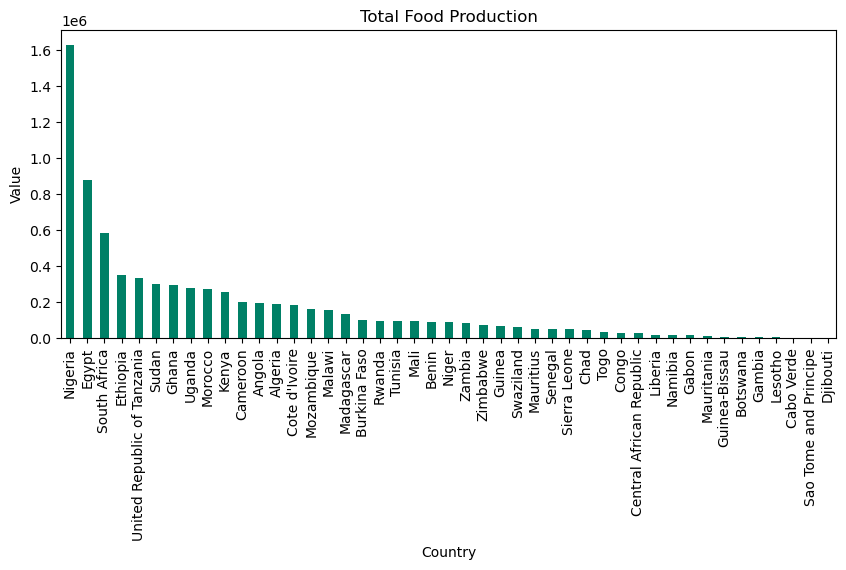

In [15]:
#Visualize the total production per country
prod.groupby('Country')['Value'].sum().sort_values(ascending = False).plot(kind='bar', figsize = (10,4),cmap = 'summer', title = 'Total Food Production',ylabel = 'Value')

- Nigeria produced the most food, while Djibouti produced the least.
- Four Countries(Gambia, Mauritius, Uganda, Zimbabwe) experienced a decline in production between 2004 and 2013.

In [16]:
#Average Food Production Per Country
prod.groupby('Country')['Value'].mean().sort_values(ascending = False)

Country
Nigeria                        2668.901639
Egypt                          1253.568571
South Africa                    772.789333
Ethiopia                        584.488333
Sudan                           558.488889
Ghana                           508.627586
Uganda                          497.180357
United Republic of Tanzania     421.268354
Angola                          362.035185
Morocco                         353.014286
Kenya                           342.496000
Algeria                         325.258621
Malawi                          320.243750
Cameroon                        304.107692
Cote d'Ivoire                   285.134375
Mozambique                      254.167742
Burkina Faso                    232.858140
Rwanda                          206.900000
Niger                           201.879070
Madagascar                      192.856522
Mali                            192.275000
Zambia                          172.293750
Tunisia                         151.988525
Ben

<AxesSubplot:title={'center':'Average Food Production'}, xlabel='Country', ylabel='Value'>

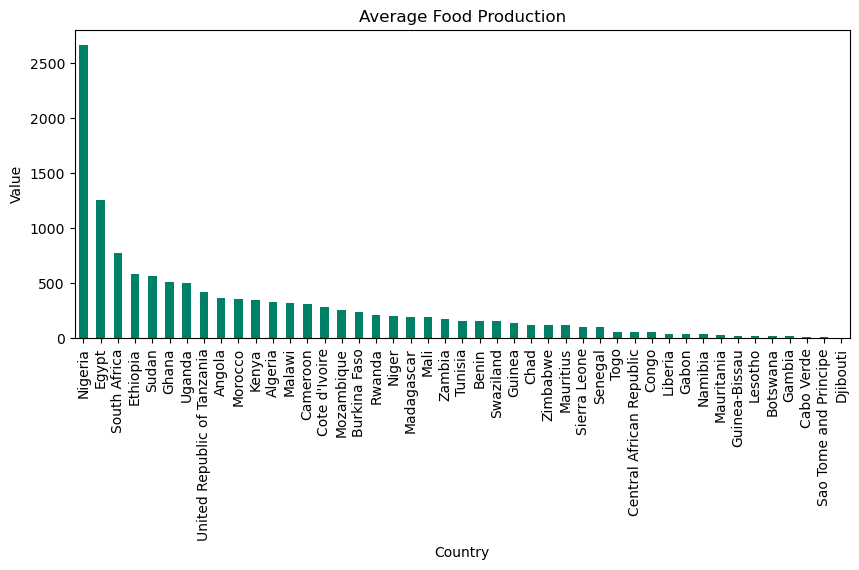

In [17]:
#Visualize the Average Food Production Per Country
prod.groupby('Country')['Value'].mean().sort_values(ascending = False).plot(kind='bar', figsize = (10,4),cmap = 'summer', title = 'Average Food Production',ylabel = 'Value')

In [18]:
#Top 10 most produced Food
prod.groupby('Item')['Value'].sum().sort_values(ascending = False)[0:10]

Item
Cassava and products       1118948
Sugar cane                  887008
Maize and products          574948
Yams                        511523
Vegetables, Other           410403
Milk - Excluding Butter     380380
Sorghum and products        241080
Wheat and products          229875
Beverages, Fermented        227037
Potatoes and products       221092
Name: Value, dtype: int64

<AxesSubplot:title={'center':'Top 10 Most Produced Food'}, xlabel='Item', ylabel='Value'>

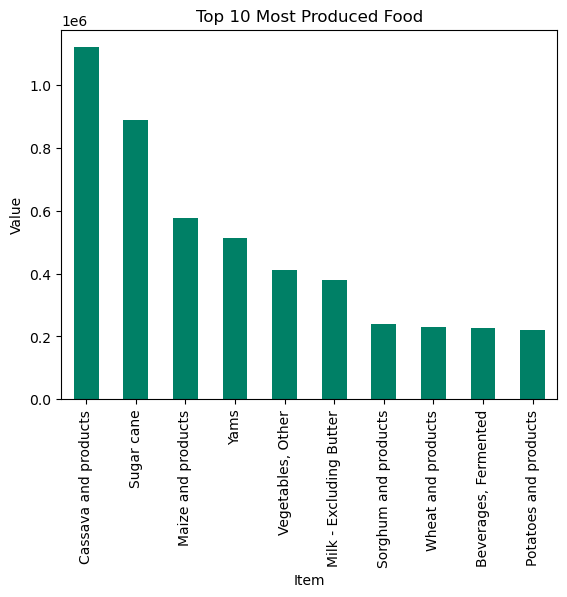

In [19]:
#Visualize the top 10 most produced food
prod.groupby('Item')['Value'].sum().sort_values(ascending = False)[0:10].plot(kind = 'bar',cmap = 'summer', title = 'Top 10 Most Produced Food',ylabel = 'Value')

In [20]:
#Least produced Food
prod.groupby('Item')['Value'].sum().sort_values(ascending = False)[-10:]

Item
Rye and products           846
Sugar non-centrifugal      686
Rape and Mustard Oil       437
Cream                      413
Fish, Body Oil             403
Cloves                     249
Molluscs, Other            214
Pepper                     199
Fish, Liver Oil             28
Aquatic Animals, Others     13
Name: Value, dtype: int64

<AxesSubplot:title={'center':'Least Produced Food'}, xlabel='Item', ylabel='Value'>

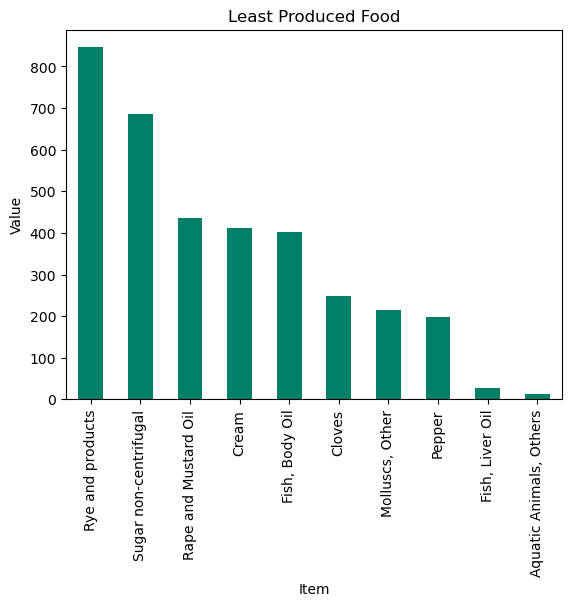

In [21]:
#Visualize the least produced food
prod.groupby('Item')['Value'].sum().sort_values(ascending = False)[-10:].plot(kind = 'bar',cmap = 'summer', title = 'Least Produced Food',ylabel = 'Value')

Text(0.5, 1.0, 'Food Production Per Year')

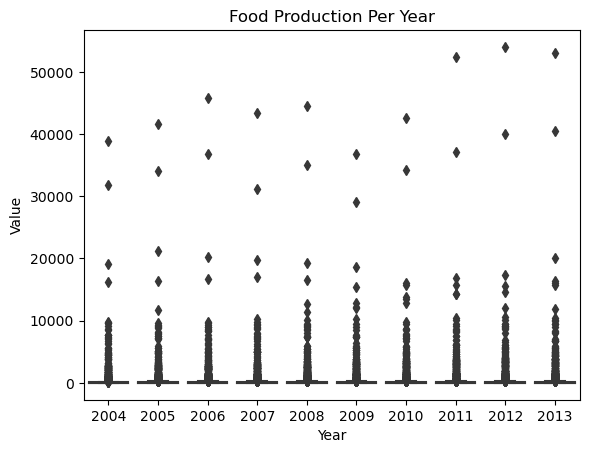

In [22]:
#Check for Outliers
sns.boxplot(x = 'Year',y = 'Value',data = prod, color = 'seagreen')
plt.title('Food Production Per Year')

In [23]:
#Find Upper and Lower Fence
prod_upper = prod_75th + (1.5*prod_iqr)
prod_lower = prod_25th - (1.5*prod_iqr)

prod_upper, prod_lower

(265.5, -154.5)

While there are no values below the lower fence of -154.5, the boxplot shows that there are many values above the upper fence of 265.5. Hence, there are outliers in the Food Production data.

**FOOD SUPPLY**

In [24]:
supp

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [25]:
#check to ensure data types are correct and there are no missing values
supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


no missing values.

In [26]:
#check the number of unique values
supp.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [27]:
#check the description
supp.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [28]:
#Average Food Consumption
supp['Value'].mean()

2469.7755555555555

In [29]:
#Median Food Consumption
supp['Value'].median()

2376.0

In [30]:
#Using the data description
supp_25th = 2174
supp_75th = 2681

supp_iqr = supp_75th - supp_25th

supp_iqr

507

<AxesSubplot:title={'center':'Food Supply Trend'}, xlabel='Year', ylabel='Value'>

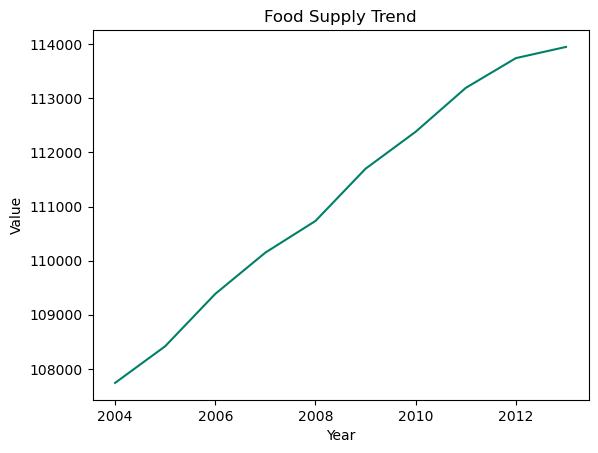

In [31]:
#visualize the food supply trend
supp.groupby('Year')['Value'].sum().plot(kind = 'line',cmap = 'summer', title = 'Food Supply Trend',ylabel = 'Value')

- Food supply has been on a steady increase sonce 2004.

In [32]:
#View the yearly supply by Country
pd.crosstab(supp.Country,supp.Year,supp.Value,aggfunc = np.sum, margins = True).sort_values(by = 'All')

Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
Country,,,,,,,,,,,
Zambia,1866,1873,1838,1781,1801,1878,1904,1907,1923,1930,18701
Ethiopia,1882,1978,1967,1957,2018,2052,2080,2103,2124,2131,20292
Chad,2026,2034,2022,2028,2027,2021,2057,2062,2124,2110,20511
Madagascar,1980,2060,2083,2096,2061,2065,2068,2085,2058,2052,20608
Central African Republic,1989,2026,2029,2090,2133,2139,2164,2154,2116,1879,20719
Zimbabwe,2044,2025,2115,2109,2094,2147,2168,2200,2197,2110,21209
Rwanda,1969,2037,2044,2053,2101,2196,2198,2213,2270,2228,21309
Kenya,2022,2161,2161,2110,2106,2165,2160,2170,2192,2206,21453
Congo,2263,2043,2143,2135,2110,2142,2143,2185,2158,2208,21530


<AxesSubplot:title={'center':'Total Food Consumption'}, xlabel='Country', ylabel='Value'>

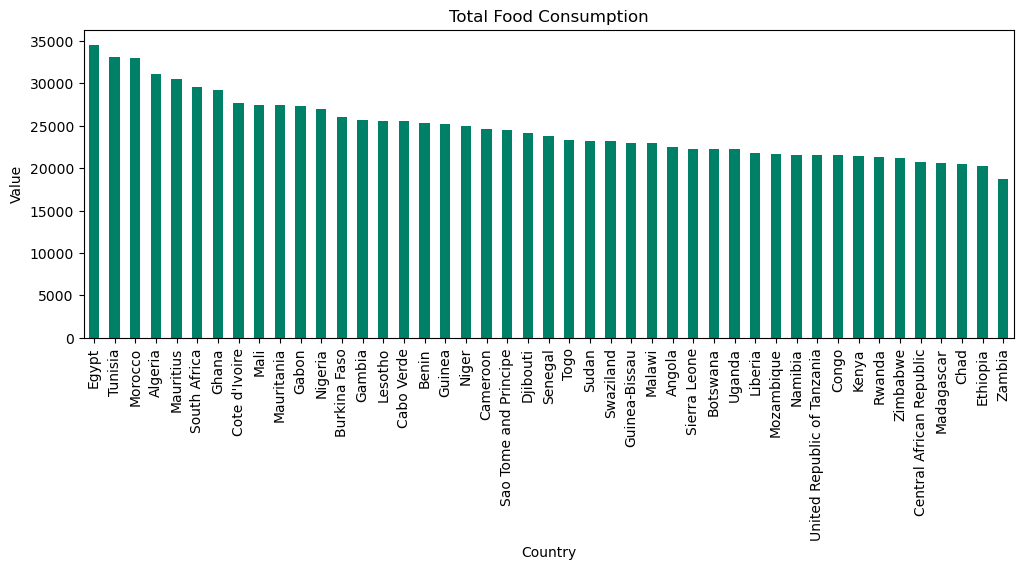

In [33]:
#Visualize the total Consumptiontion per country
supp.groupby('Country')['Value'].sum().sort_values(ascending = False).plot(kind='bar', figsize = (12,4),cmap = 'summer', title = 'Total Food Consumption',ylabel = 'Value')

- Seven Countries experienced a decline in food consumption between 2004 and 2013. Countries - Central Africa Republic, Congo, Lesotho, Namibia, Sao Tome and Principe, Swaziland and Uganda.

In [34]:
#Average Food Consumption Per Country
supp.groupby('Country')['Value'].mean().sort_values(ascending = False)

Country
Egypt                          3458.0
Tunisia                        3305.5
Morocco                        3296.7
Algeria                        3111.8
Mauritius                      3054.3
South Africa                   2962.9
Ghana                          2918.0
Cote d'Ivoire                  2766.6
Mali                           2750.2
Mauritania                     2744.3
Gabon                          2729.9
Nigeria                        2698.8
Burkina Faso                   2607.2
Gambia                         2569.5
Lesotho                        2558.8
Cabo Verde                     2551.4
Benin                          2537.8
Guinea                         2518.0
Niger                          2502.4
Cameroon                       2460.3
Sao Tome and Principe          2446.2
Djibouti                       2416.5
Senegal                        2378.4
Togo                           2333.9
Sudan                          2323.8
Swaziland                      2317.1
Guin

<AxesSubplot:title={'center':'Average Food Consumption'}, xlabel='Country', ylabel='Value'>

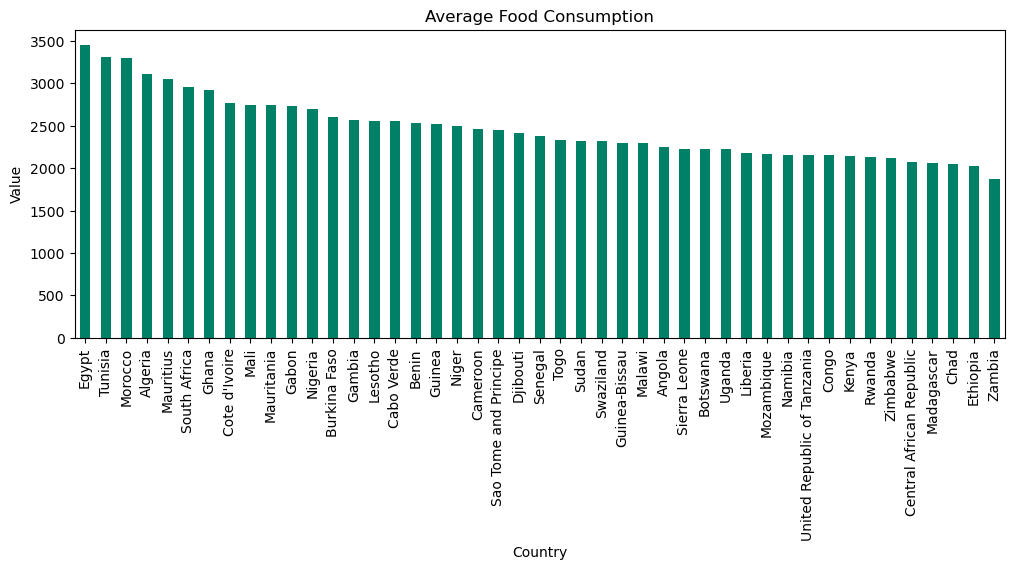

In [35]:
#Visualize the Average Food Consumption Per Country
supp.groupby('Country')['Value'].mean().sort_values(ascending = False).plot(kind='bar', figsize = (12,4),cmap = 'summer', title = 'Average Food Consumption',ylabel = 'Value')

Text(0.5, 1.0, 'Food Consumption Per Year')

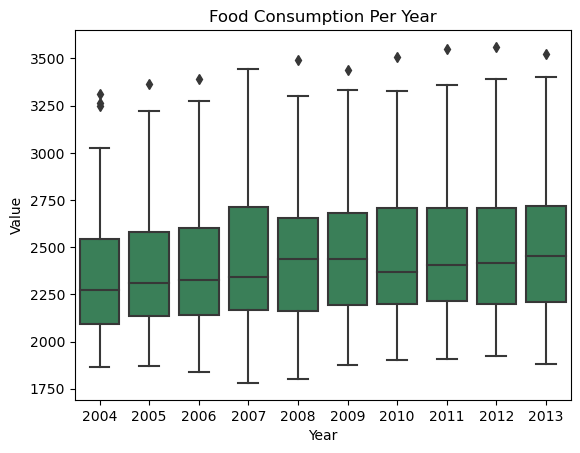

In [36]:
#Check for Outliers
sns.boxplot(x = 'Year',y = 'Value',data = supp, color = 'seagreen')
plt.title('Food Consumption Per Year')

In [37]:
#Find Upper and Lower Fence
supp_upper = supp_75th + (1.5*supp_iqr)
supp_lower = supp_25th - (1.5*supp_iqr)

supp_upper, supp_lower

(3441.5, 1413.5)

- There are no values below the lower fence, and there are a few values above the upper fence.

In [38]:
#Compare the food production and supply between 2004 and 2013
production = prod.groupby('Year')['Value'].sum()
supply = supp.groupby('Year')['Value'].sum()
af_production = pd.DataFrame(data=production).reset_index()
af_supply = pd.DataFrame(data=supply).reset_index()
corr = af_production.merge(af_supply, on = ['Year','Year'])
corr = corr.set_index('Year')
corr.rename(columns={'Value_x':'prod_value','Value_y':'supp_value'},inplace = True)
corr

,prod_value,supp_value
Year,,
2004,663006,107740
2005,691257,108418
2006,718602,109386
2007,705659,110149
2008,736804,110734
2009,746870,111700
2010,786466,112383
2011,812214,113194
2012,841667,113744


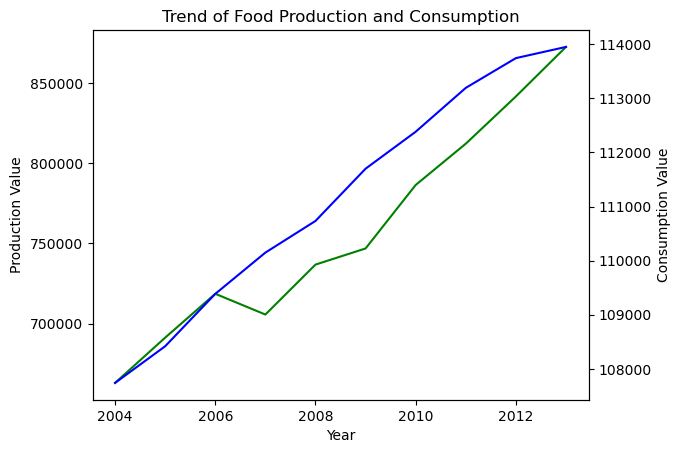

In [39]:
#Visualize the trend of food production and food consumption
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

corr.prod_value.plot(kind = 'line', color = 'green', ax = ax)
corr.supp_value.plot(kind = 'line', color = 'blue', ax = ax2)

ax.set_ylabel('Production Value')
ax2.set_ylabel('Consumption Value')
plt.title('Trend of Food Production and Consumption')


plt.show()

- The decline in food production in 2007 had no visible effect on the food supply in the same year.

In [40]:
# Compare the food production and food consumption in the Highest Producing Country - Nigeria
nig_prod = pd.crosstab(prod.Year,prod.Country,prod.Value,aggfunc = np.sum)['Nigeria'].reset_index()
nig_supp = pd.crosstab(supp.Year,supp.Country,supp.Value,aggfunc = np.sum)['Nigeria'].reset_index()
nig = nig_prod.merge(nig_supp, on = ['Year','Year'])
nig.rename(columns={'Nigeria_x':'nig_prod','Nigeria_y':'nig_supp'},inplace = True)
nig = nig.set_index('Year')
nig

,nig_prod,nig_supp
Year,,
2004,149857,2655
2005,158149,2705
2006,168987,2725
2007,157273,2720
2008,167935,2723
2009,141270,2683
2010,158709,2706
2011,167403,2706
2012,178816,2665


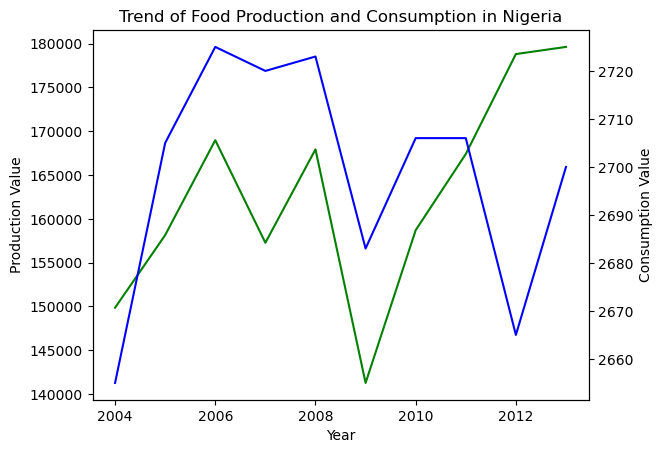

In [41]:
#Visualize the production and consumption in Nigeria over the years
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

nig.nig_prod.plot(kind = 'line', color = 'green', ax = ax)
nig.nig_supp.plot(kind = 'line', color = 'blue', ax = ax2)

ax.set_ylabel('Production Value')
ax2.set_ylabel('Consumption Value')
plt.title('Trend of Food Production and Consumption in Nigeria')

plt.show()

- There was a positive correlation between food production and consumption in Nigeria, from 2004 to 2010.

In [42]:
#Compare the food production and consumption in the Second Highest Producing Country and Highest Consuming Country - Egypt
eg_prod = pd.crosstab(prod.Year,prod.Country,prod.Value,aggfunc = np.sum)['Egypt'].reset_index()
eg_supp = pd.crosstab(supp.Year,supp.Country,supp.Value,aggfunc = np.sum)['Egypt'].reset_index()
eg = eg_prod.merge(eg_supp, on = ['Year','Year'])
eg.rename(columns={'Egypt_x':'eg_prod','Egypt_y':'eg_supp'},inplace = True)
eg = eg.set_index('Year')
eg

,eg_prod,eg_supp
Year,,
2004,75989,3309
2005,80422,3367
2006,83191,3389
2007,86828,3445
2008,89489,3490
2009,90375,3441
2010,88450,3507
2011,90767,3549
2012,96139,3561


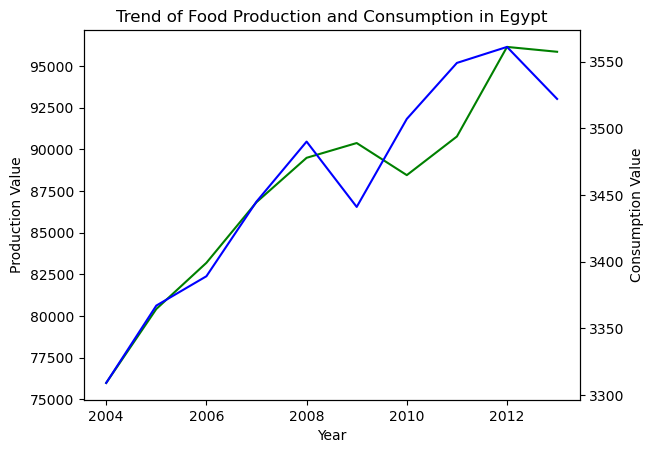

In [43]:
#Visualize the production and consumption in Egypt over the years
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

eg.eg_prod.plot(kind = 'line', color = 'green', ax = ax)
eg.eg_supp.plot(kind = 'line', color = 'blue', ax = ax2)

ax.set_ylabel('Production Value')
ax2.set_ylabel('Consumption Value')
plt.title('Trend of Food Production and Consumption in Egypt')

plt.show()

- There was a negative correlation between food production and food consumption in Egypt, from 2009 to 2013

In [44]:
#Compare the food production and consumption in the Second Highest Consuming Country - Tunisia
tu_prod = pd.crosstab(prod.Year,prod.Country,prod.Value,aggfunc = np.sum)['Tunisia'].reset_index()
tu_supp = pd.crosstab(supp.Year,supp.Country,supp.Value,aggfunc = np.sum)['Tunisia'].reset_index()
tu = tu_prod.merge(tu_supp, on = ['Year','Year'])
tu.rename(columns={'Tunisia_x':'tu_prod','Tunisia_y':'tu_supp'},inplace = True)
tu = tu.set_index('Year')
tu

,tu_prod,tu_supp
Year,,
2004,8503,3248
2005,8795,3220
2006,8688,3273
2007,9052,3252
2008,8842,3302
2009,9731,3335
2010,8854,3326
2011,9790,3360
2012,10509,3390


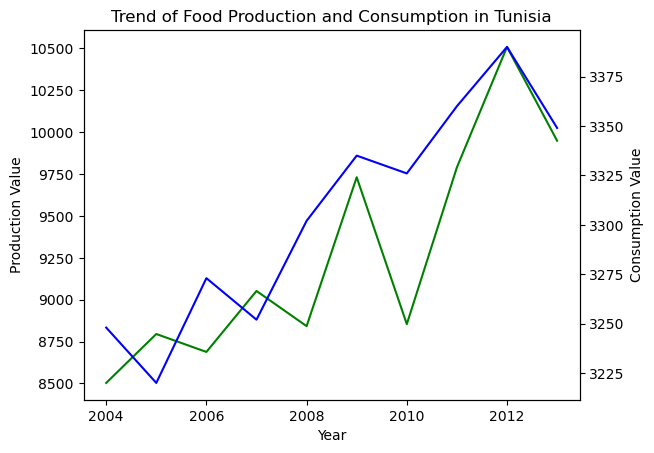

In [45]:
#Visualize the production and consumption in Tunisia over the years
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

tu.tu_prod.plot(kind = 'line', color = 'green', ax = ax)
tu.tu_supp.plot(kind = 'line', color = 'blue', ax = ax2)

ax.set_ylabel('Production Value')
ax2.set_ylabel('Consumption Value')
plt.title('Trend of Food Production and Consumption in Tunisia')

plt.show()

- There was a negative correlation between food production and food consumption in Tunisia, from 2004 to 2008, after which there was a positive correlation between both values.